In [2]:
import os
import glob
import sys

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from eda_helpers import plot_bargraph_with_groupings, plot_images

## Extract train and test dataset

In [25]:
base_path = '../../data/Stanford_Dogs_Dataset/images/Images'

train_df = pd.DataFrame(columns=['image', 'label', 'class'])
test_df = pd.DataFrame(columns=['image', 'label', 'class'])
classes = []
i = 0
for dir_name in os.listdir(base_path):
    className = '-'.join(dir_name.split('-')[1:])
    classes.append(className)
    
    images = []
    for class_dir in os.scandir(os.path.join(base_path, dir_name)):
        images.append([class_dir.path, className, i])
            
    num_of_images = len(images)
    train_class_df = pd.DataFrame(np.array(images[:int(num_of_images*0.8)]), columns=['image', 'label', 'class'])
    test_class_df = pd.DataFrame(np.array(images[int(num_of_images*0.8):]), columns=['image', 'label', 'class'])
    
    train_df = train_df.append(train_class_df)
    test_df = test_df.append(test_class_df)
    i += 1
    
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [59]:
train_df.head(5)

,image,label,class
0,../../data/Stanford_Dogs_Dataset/images/Images...,Weimaraner,0
1,../../data/Stanford_Dogs_Dataset/images/Images...,Weimaraner,0
2,../../data/Stanford_Dogs_Dataset/images/Images...,Weimaraner,0
3,../../data/Stanford_Dogs_Dataset/images/Images...,Weimaraner,0
4,../../data/Stanford_Dogs_Dataset/images/Images...,Weimaraner,0


## Train Dataset Examples

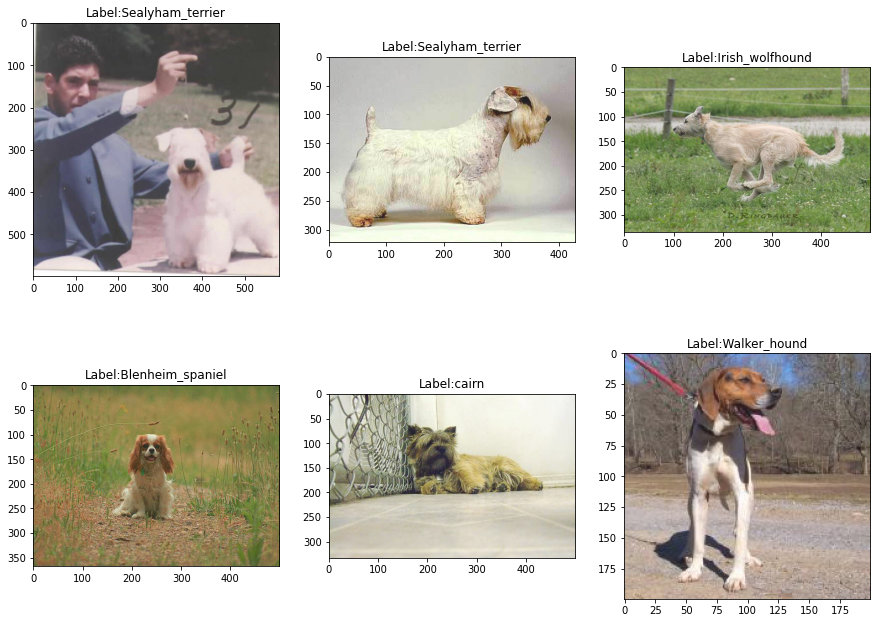

In [56]:
plot_images(train_df, '')

## Train Data Distribution

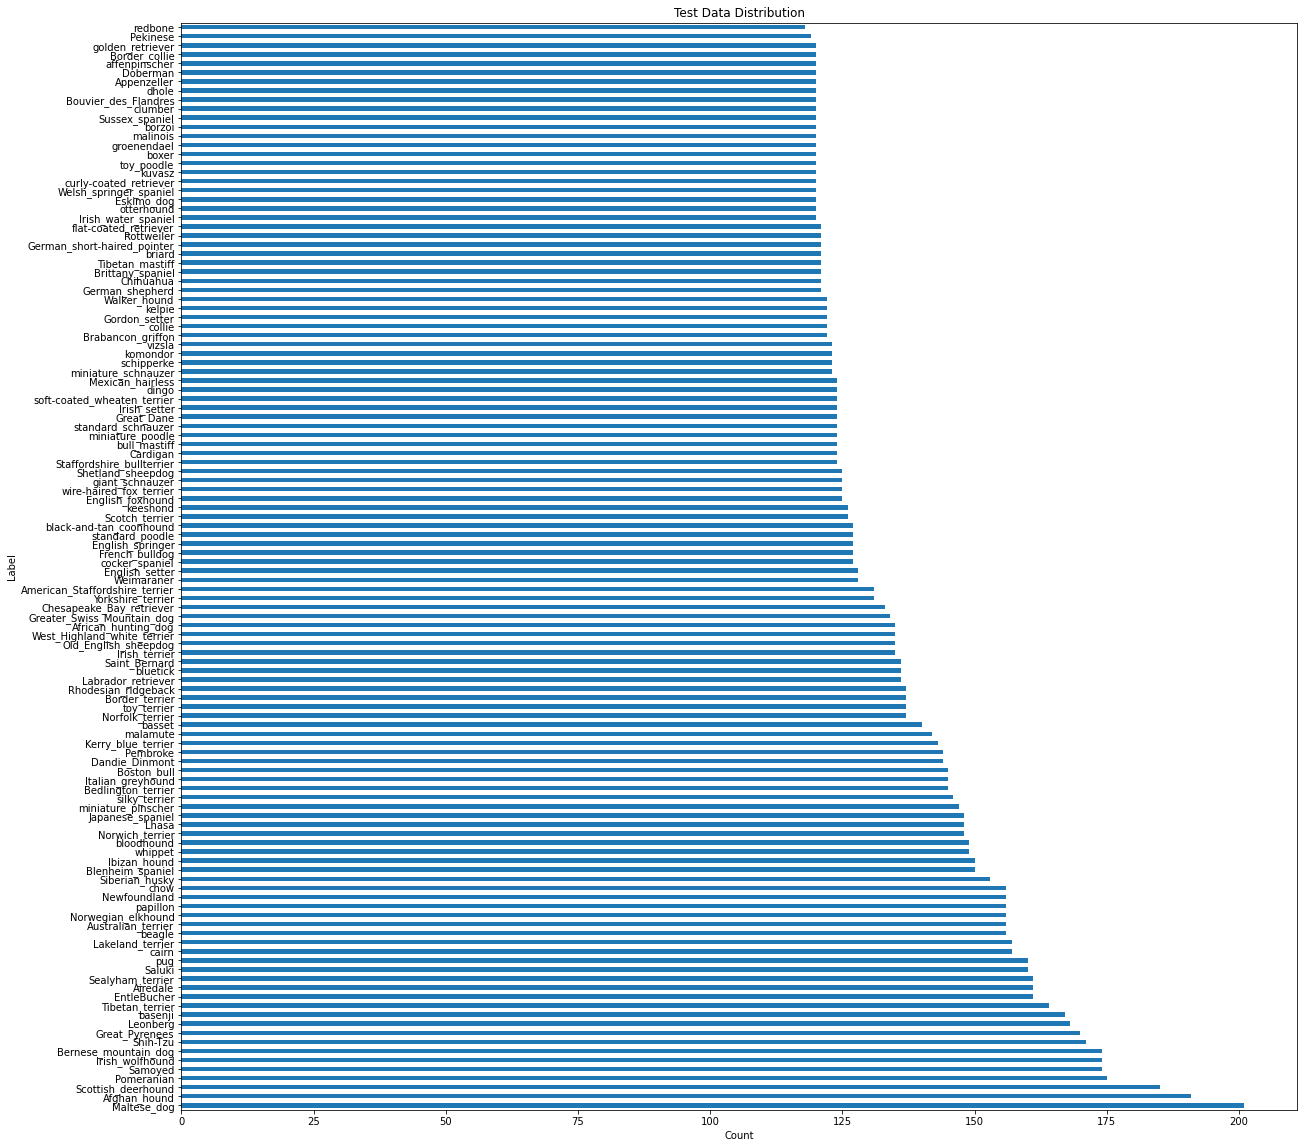

In [57]:
plot_bargraph_with_groupings(train_df, 'label', 'Test Data Distribution', 'Count', 'Label')

In [61]:
train_df['label'].value_counts()

Maltese_dog           201
Afghan_hound          191
Scottish_deerhound    185
Pomeranian            175
Samoyed               174
                     ... 
affenpinscher         120
Border_collie         120
golden_retriever      120
Pekinese              119
redbone               118
Name: label, Length: 120, dtype: int64

In [60]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16418 entries, 0 to 16417
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   16418 non-null  object
 1   label   16418 non-null  object
 2   class   16418 non-null  object
dtypes: object(3)
memory usage: 384.9+ KB


## Test Data Distribution

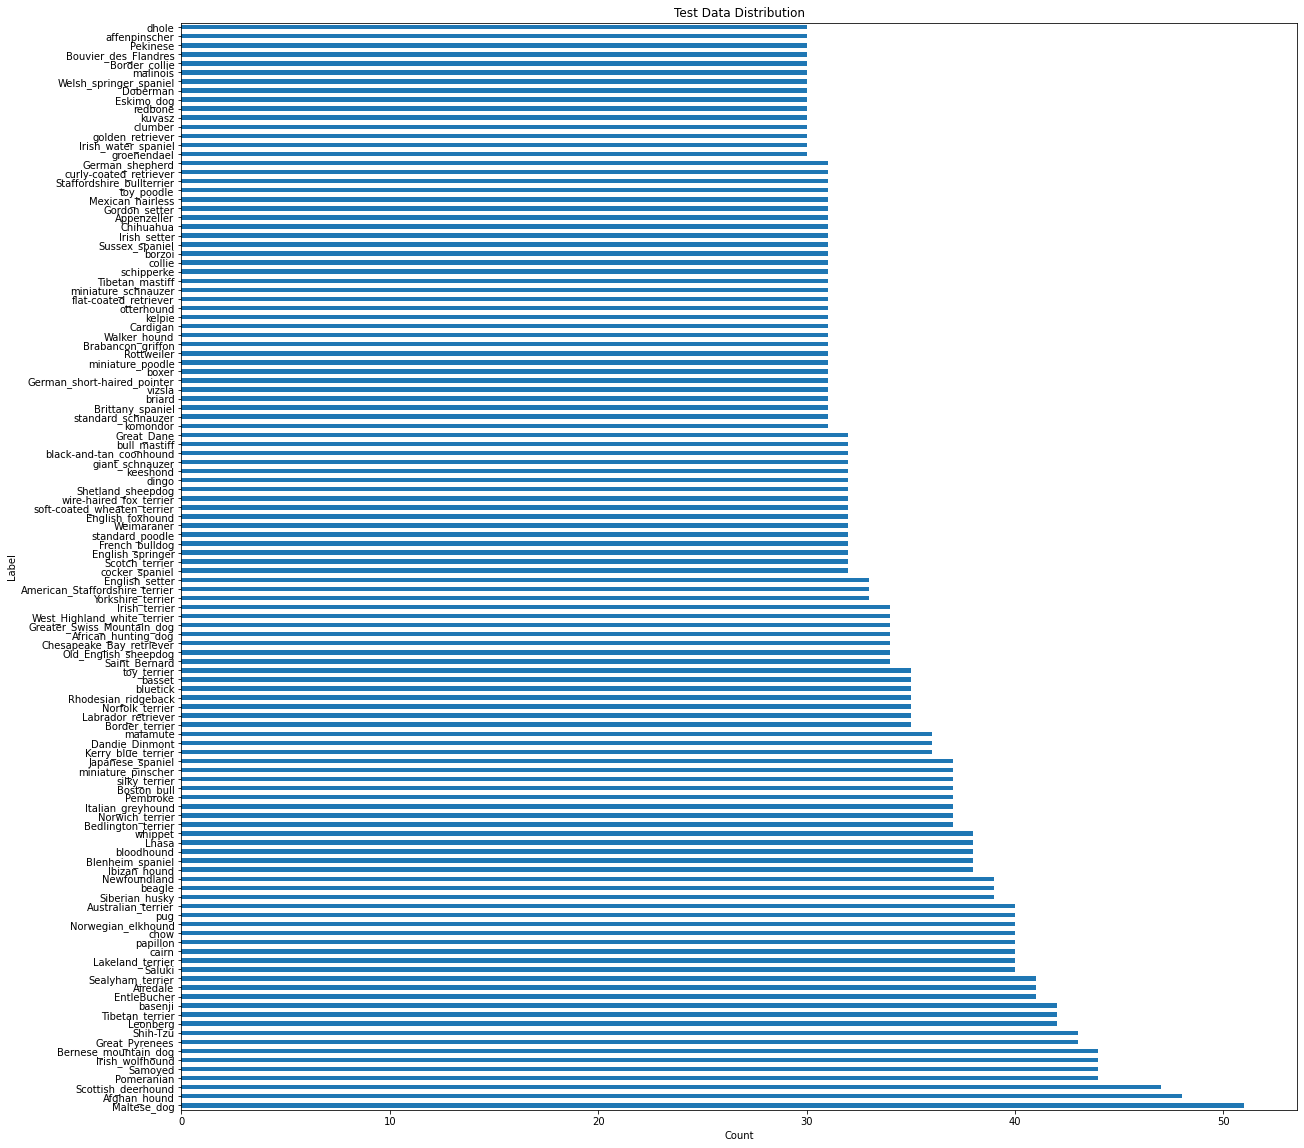

In [58]:
plot_bargraph_with_groupings(test_df, 'label', 'Test Data Distribution', 'Count', 'Label')

In [63]:
test_df['label'].value_counts()

Maltese_dog             51
Afghan_hound            48
Scottish_deerhound      47
Pomeranian              44
Samoyed                 44
                        ..
Border_collie           30
Bouvier_des_Flandres    30
Pekinese                30
affenpinscher           30
dhole                   30
Name: label, Length: 120, dtype: int64

In [62]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4162 entries, 0 to 4161
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   4162 non-null   object
 1   label   4162 non-null   object
 2   class   4162 non-null   object
dtypes: object(3)
memory usage: 97.7+ KB
